# 🧭 Exploratory Data Analysis — California Housing
**Dataset:** `housing_with_ocean_proximity.csv`

This notebook performs a professional and detailed EDA:
- Data overview and cleanliness checks
- Summary statistics and distributions
- Feature relationships and correlations
- Geospatial view of housing values
- Feature engineering and insights
- Clear findings and next-step recommendations

---

In [1]:
# 1) Imports and settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10,6)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# 2) Load dataset
file_path = 'housing_with_ocean_proximity.csv'  # ensure file is in same directory
df = pd.read_csv(file_path)
print('Dataset loaded. Shape:', df.shape)
df.head()

Dataset loaded. Shape: (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,"452,600.00",NEAR BAY
1,-122.22,37.86,21.00,"7,099.00","1,106.00","2,401.00","1,138.00",8.30,"358,500.00",NEAR BAY
2,-122.24,37.85,52.00,"1,467.00",190.00,496.00,177.00,7.26,"352,100.00",NEAR BAY
3,-122.25,37.85,52.00,"1,274.00",235.00,558.00,219.00,5.64,"341,300.00",NEAR BAY
4,-122.25,37.85,52.00,"1,627.00",280.00,565.00,259.00,3.85,"342,200.00",NEAR BAY


## 3) Quick data overview
- Data types
- Non-null counts
- Basic descriptive statistics

In [3]:
# Data info and basic stats
df.info()
display(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,count,mean,std,min,25%,50%,75%,max
longitude,"20,640.00",-119.57,2.00,-124.35,-121.80,-118.49,-118.01,-114.31
latitude,"20,640.00",35.63,2.14,32.54,33.93,34.26,37.71,41.95
housing_median_age,"20,640.00",28.64,12.59,1.00,18.00,29.00,37.00,52.00
total_rooms,"20,640.00","2,635.76","2,181.62",2.00,"1,447.75","2,127.00","3,148.00","39,320.00"
total_bedrooms,"20,433.00",537.87,421.39,1.00,296.00,435.00,647.00,"6,445.00"
population,"20,640.00","1,425.48","1,132.46",3.00,787.00,"1,166.00","1,725.00","35,682.00"
households,"20,640.00",499.54,382.33,1.00,280.00,409.00,605.00,"6,082.00"
median_income,"20,640.00",3.87,1.90,0.50,2.56,3.53,4.74,15.00
median_house_value,"20,640.00","206,855.82","115,395.62","14,999.00","119,600.00","179,700.00","264,725.00","500,001.00"


## 4) Missing values & duplicates

In [4]:
# Missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing>0]

total_bedrooms    207
dtype: int64

In [5]:
# Check duplicates
dups = df.duplicated().sum()
print('Number of duplicate rows:', dups)

Number of duplicate rows: 0


## 5) Target variable: `median_house_value`
- Distribution, skewness, and summary stats
- Consider log-transform if heavily skewed

Target summary:


count    20,640.00
mean    206,855.82
std     115,395.62
min      14,999.00
25%     119,600.00
50%     179,700.00
75%     264,725.00
max     500,001.00
Name: median_house_value, dtype: float64

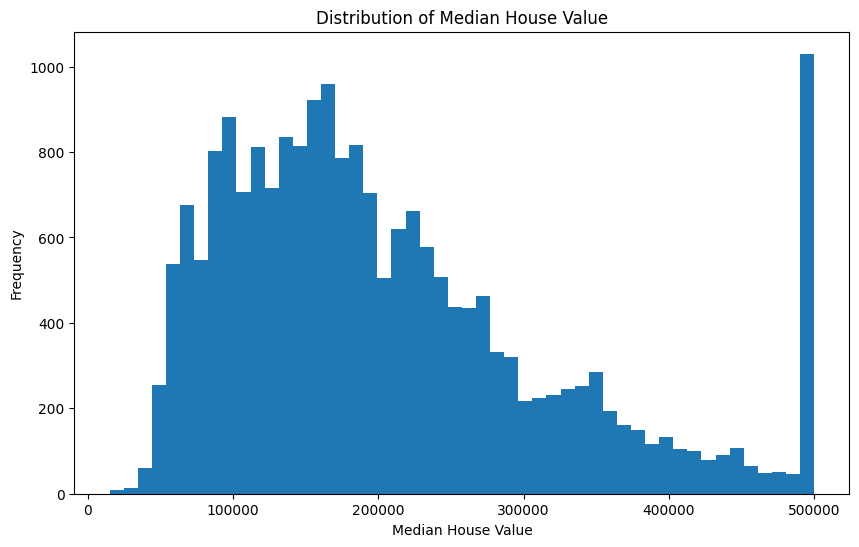

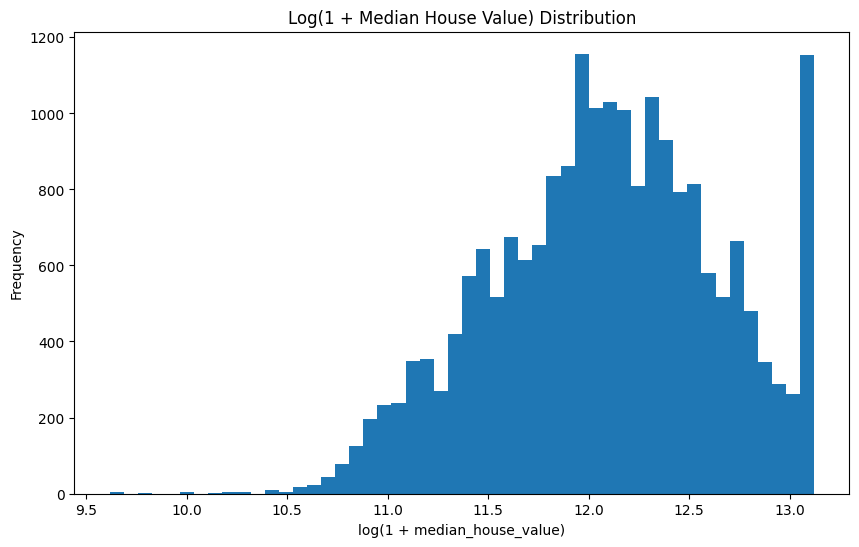

In [6]:
# Target distribution
target = 'median_house_value'
print('Target summary:')
display(df[target].describe())

plt.figure()
plt.hist(df[target], bins=50)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

# Log-transform visualization
plt.figure()
plt.hist(np.log1p(df[target]), bins=50)
plt.title('Log(1 + Median House Value) Distribution')
plt.xlabel('log(1 + median_house_value)')
plt.ylabel('Frequency')
plt.show()

## 6) Numeric feature distributions
Plot histograms for all numeric features to detect skewness and outliers.

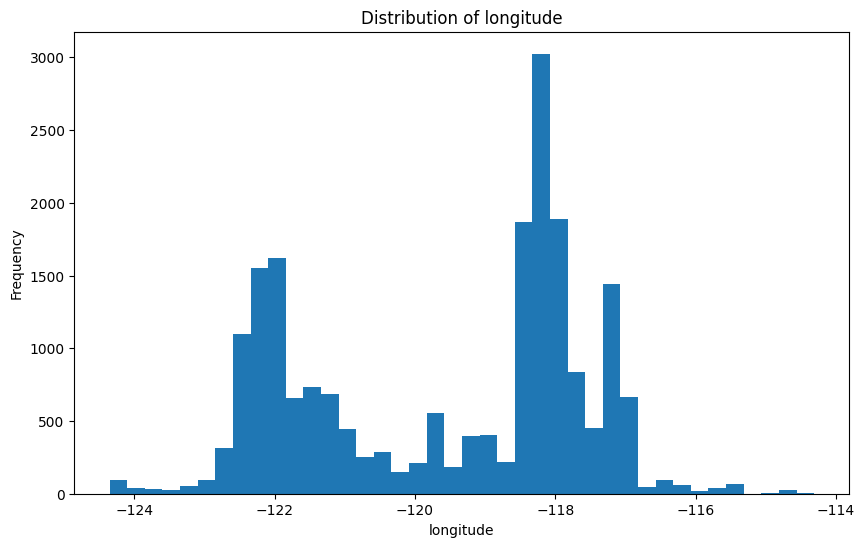

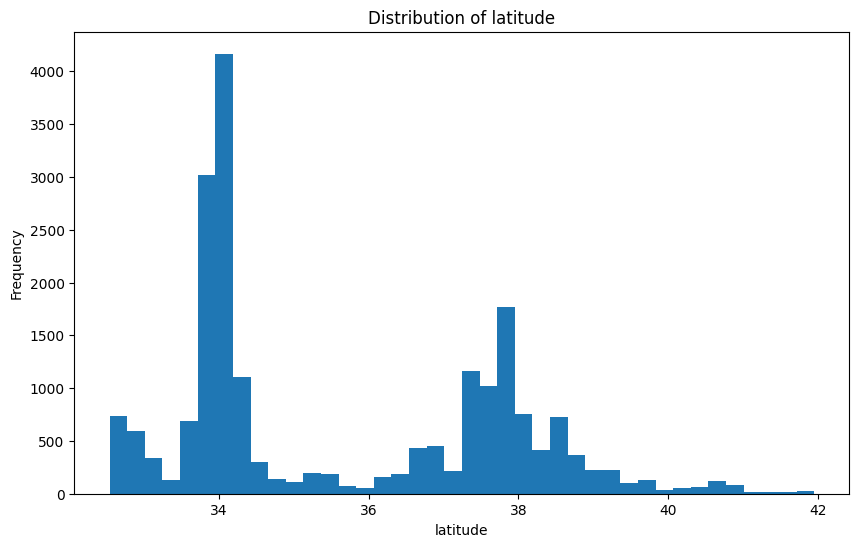

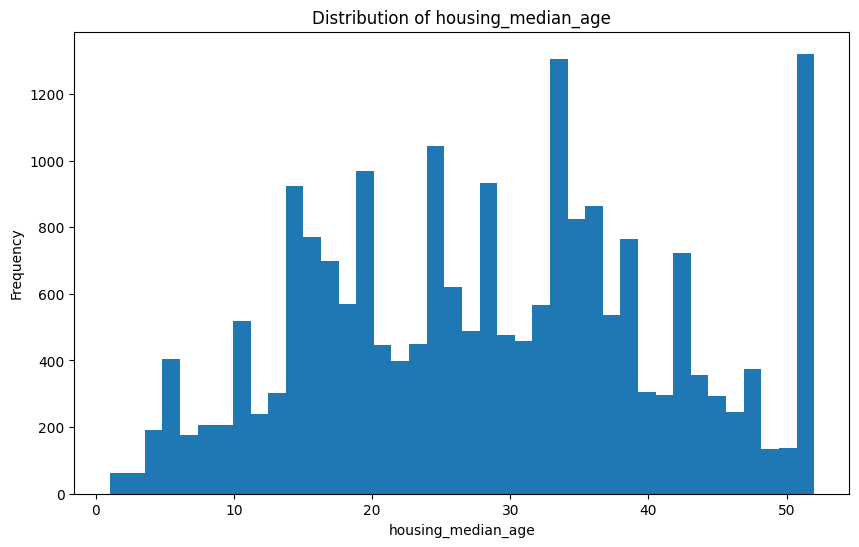

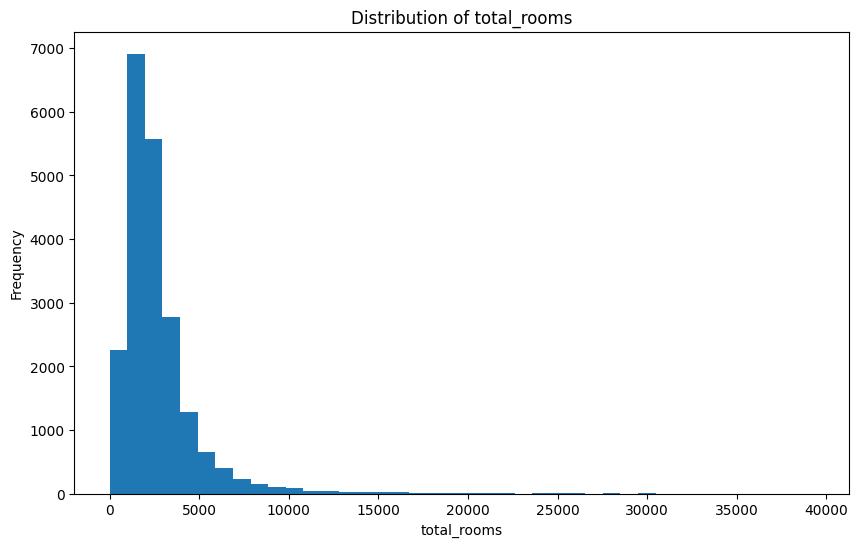

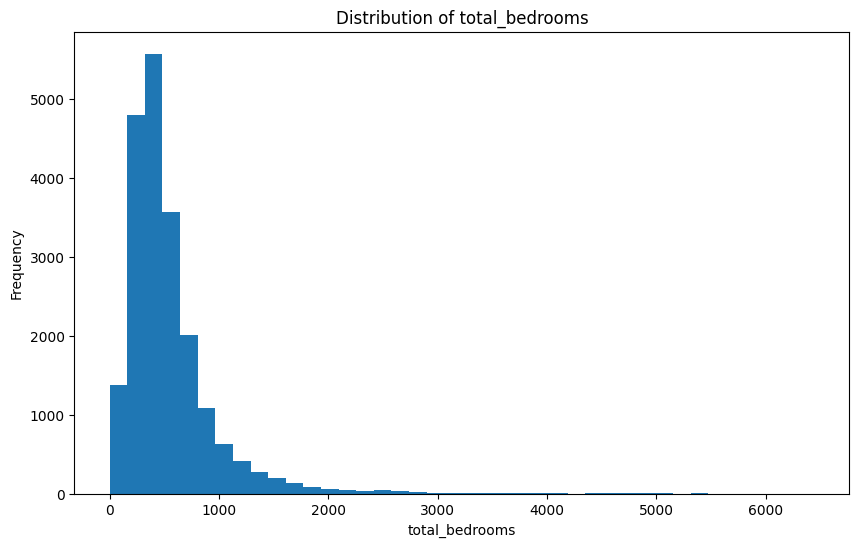

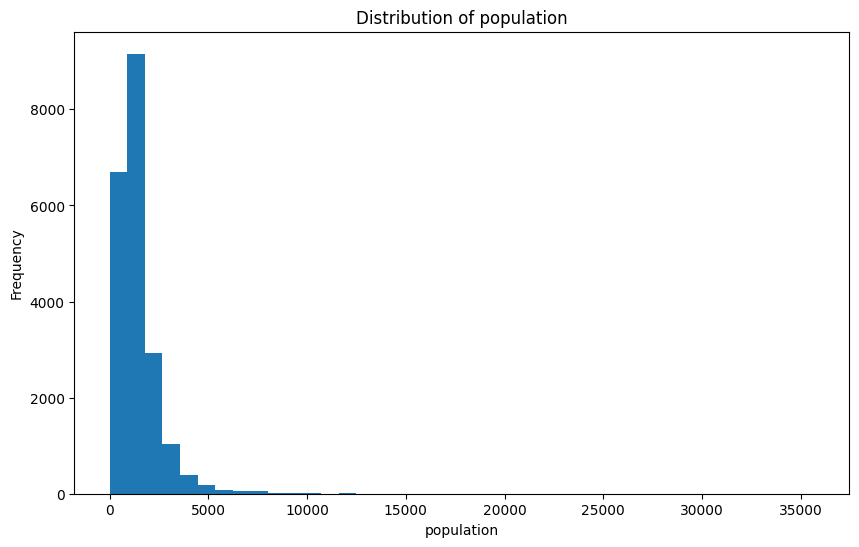

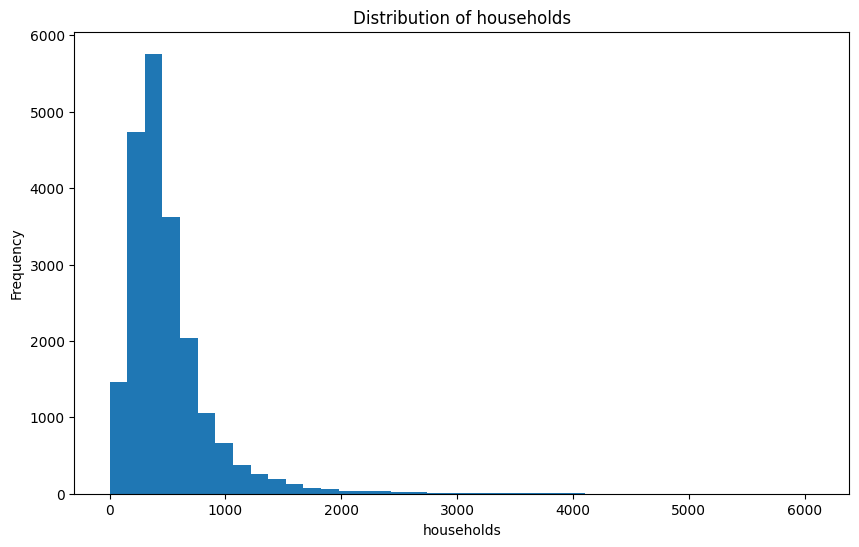

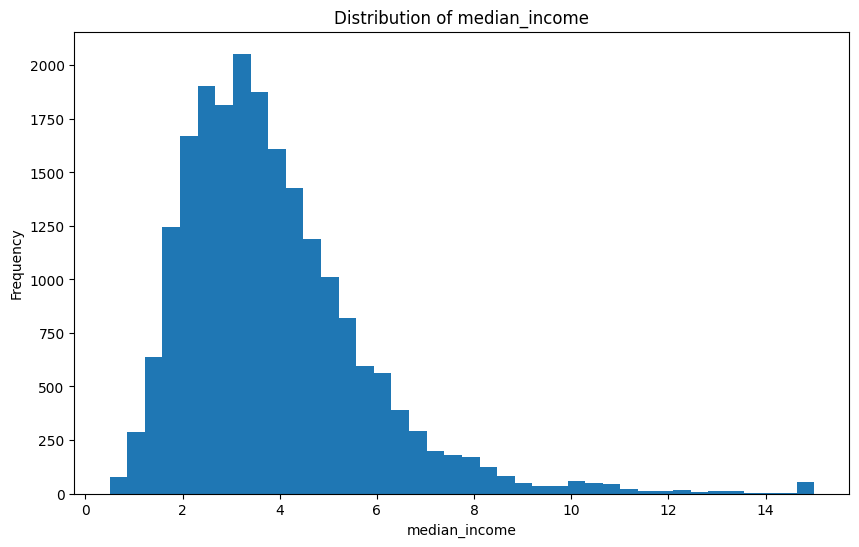

In [7]:
# Histograms for numeric features
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove('median_house_value')  # exclude target from this loop

for col in num_cols:
    plt.figure()
    plt.hist(df[col].dropna(), bins=40)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## 7) Boxplots to highlight outliers

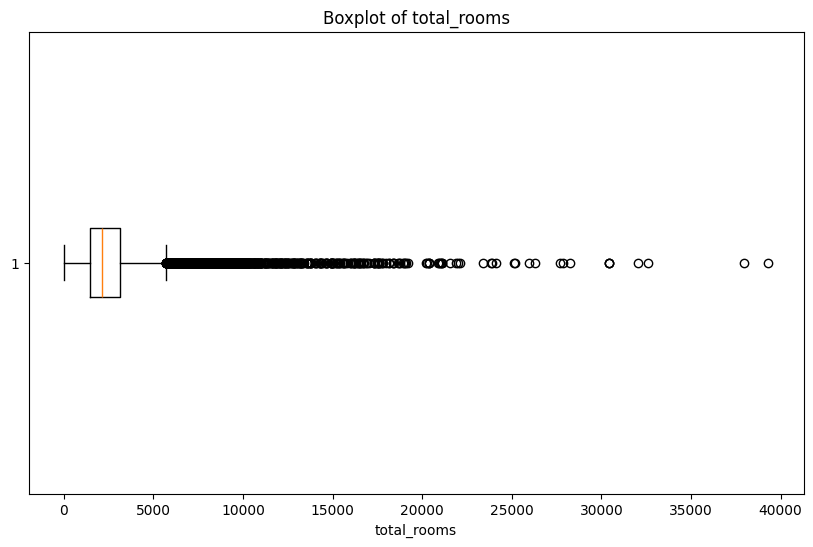

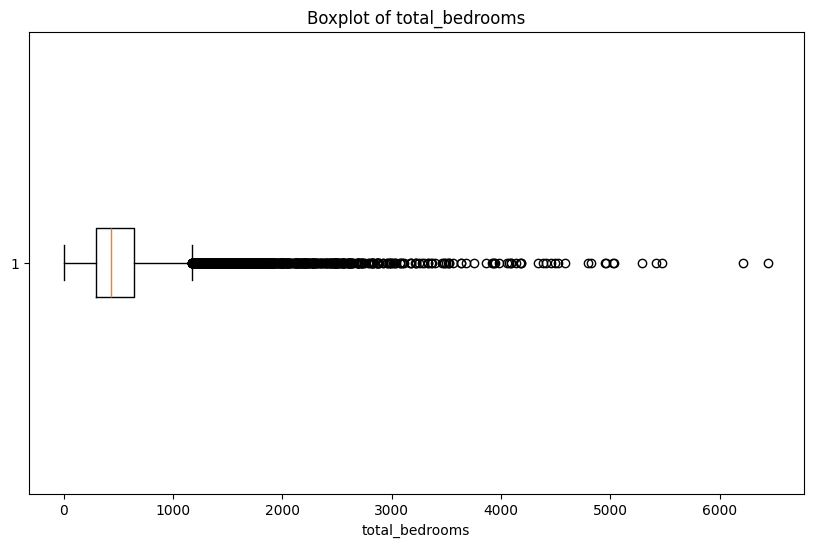

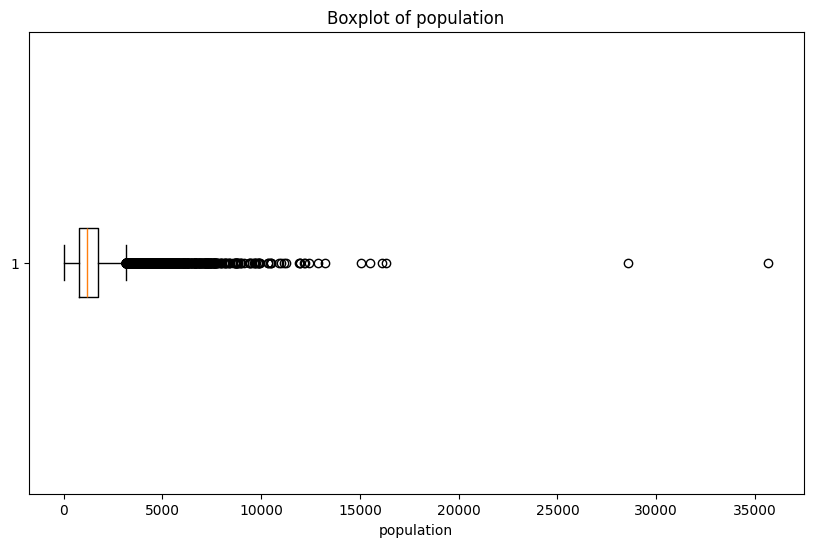

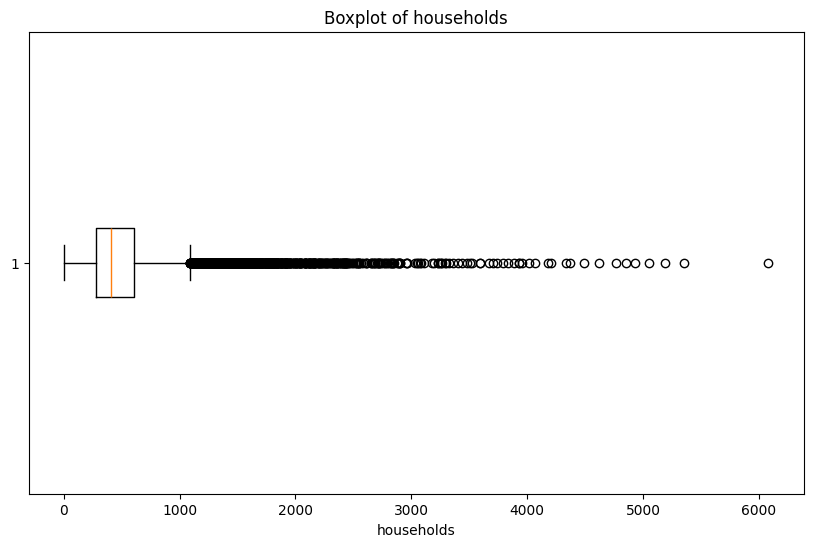

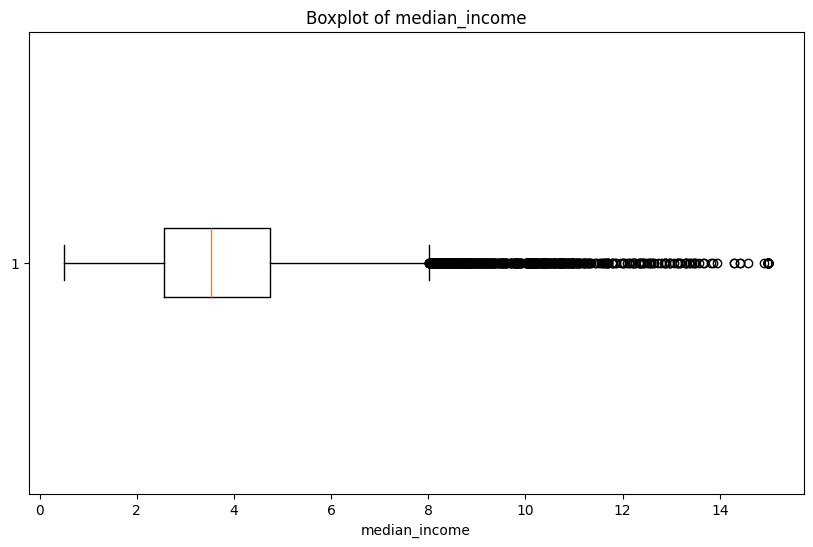

In [8]:
for col in ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']:
    plt.figure()
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

## 8) Correlation matrix
- Compute correlation of numeric features with the target
- Visualize correlation matrix

In [ ]:
# Correlation with target
corr_with_target = df.corr(numeric_only=True)[target].sort_values(ascending=False)
corr_with_target

median_house_value    1.00
median_income         0.69
total_rooms           0.13
housing_median_age    0.11
households            0.07
total_bedrooms        0.05
population           -0.02
longitude            -0.05
latitude             -0.14
Name: median_house_value, dtype: float64

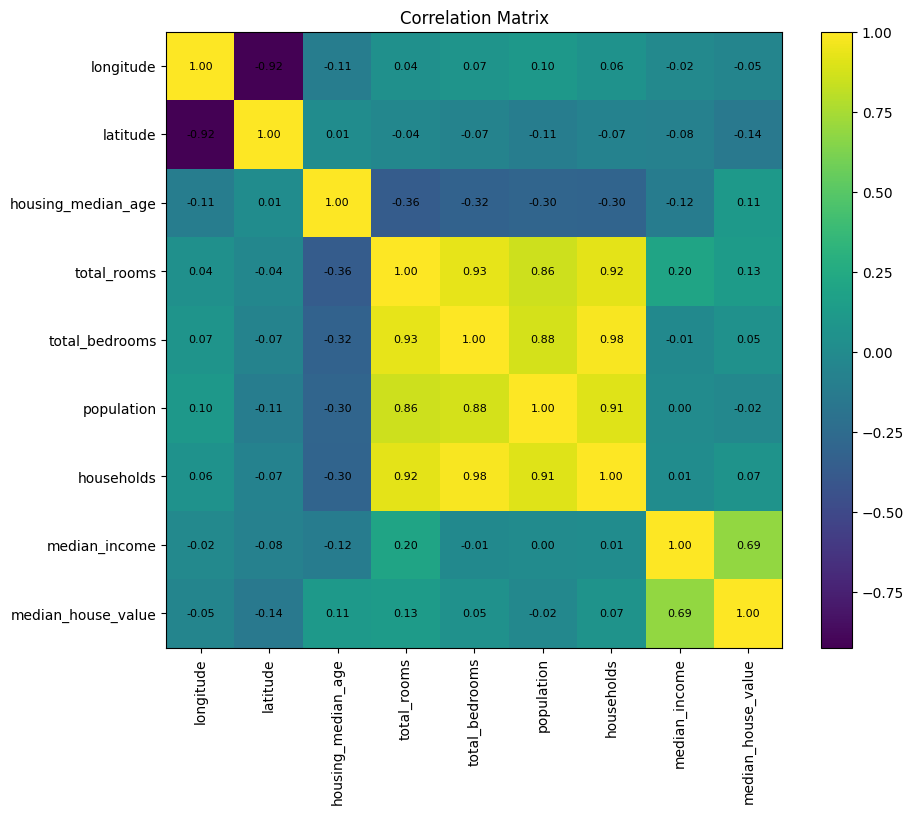

In [13]:
# Correlation matrix visualization (using matplotlib)
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
im = plt.imshow(corr, interpolation='none')
plt.colorbar(im)
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlation Matrix')
# Annotate correlation values
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', fontsize=8)
plt.show()

## 9) Scatter plots — selected relationships
- median_income vs median_house_value
- rooms/household relationships
- population vs median_house_value

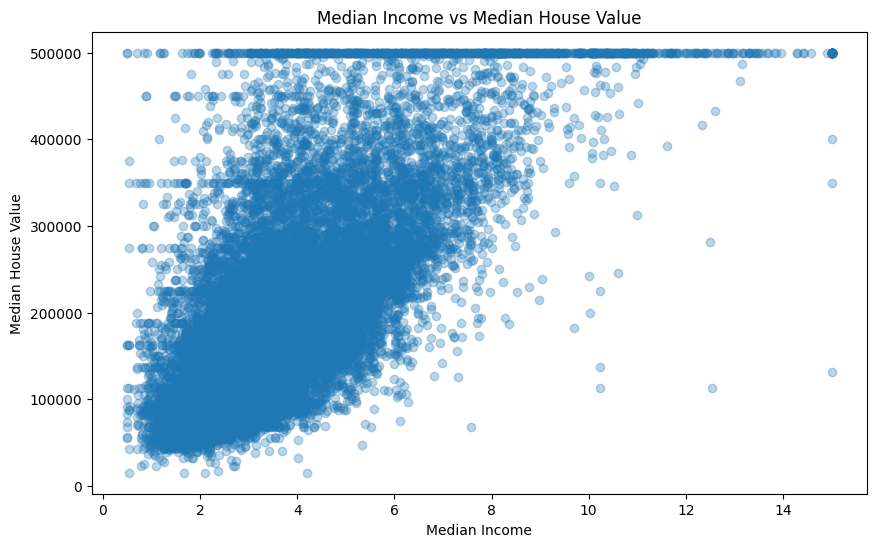

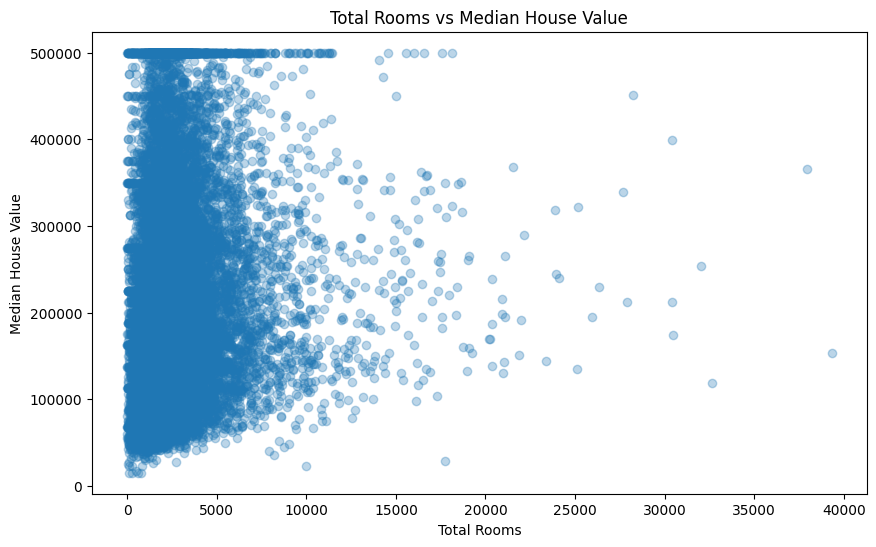

In [14]:
# Scatter: median_income vs median_house_value
plt.figure()
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.3)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median Income vs Median House Value')
plt.show()

# Scatter: total_rooms vs median_house_value
plt.figure()
plt.scatter(df['total_rooms'], df['median_house_value'], alpha=0.3)
plt.xlabel('Total Rooms')
plt.ylabel('Median House Value')
plt.title('Total Rooms vs Median House Value')
plt.show()

## 10) Geospatial visualization
Plot longitude vs latitude and color by median house value to see spatial patterns.

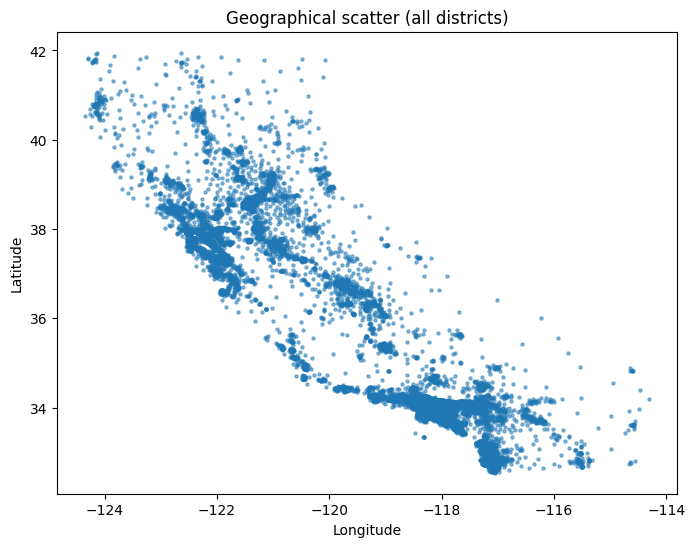

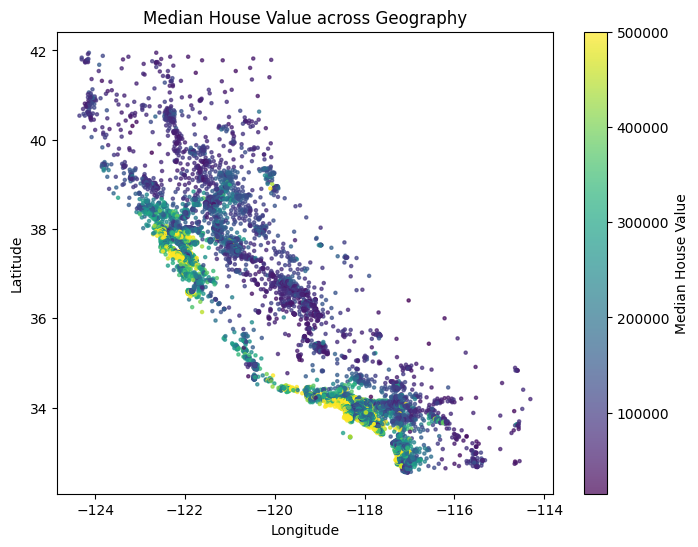

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(df['longitude'], df['latitude'], s=5, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical scatter (all districts)')
plt.show()

# Color by median house value
plt.figure(figsize=(8,6))
sc = plt.scatter(df['longitude'], df['latitude'], s=5, alpha=0.7, c=df['median_house_value'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Median House Value across Geography')
plt.colorbar(sc, label='Median House Value')
plt.show()

## 11) Categorical analysis: `ocean_proximity`
- Count per category
- Median house value by category

In [16]:
# Value counts
display(df['ocean_proximity'].value_counts())

# Median house value grouped by category
grouped = df.groupby('ocean_proximity')['median_house_value'].agg(['count','median','mean']).sort_values(by='median', ascending=False)
grouped

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

,count,median,mean
ocean_proximity,,,
ISLAND,5,"414,700.00","380,440.00"
NEAR BAY,2290,"233,800.00","259,212.31"
NEAR OCEAN,2658,"229,450.00","249,433.98"
<1H OCEAN,9136,"214,850.00","240,084.29"
INLAND,6551,"108,500.00","124,805.39"


## 12) Feature engineering
Create new features often useful in housing models:
- rooms_per_household = total_rooms / households
- bedrooms_per_room = total_bedrooms / total_rooms
- population_per_household = population / households

Then check correlations with target.

In [17]:
# Create features
df = df.copy()
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

# Handle any inf or NaN after division
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

# Correlations of new features with target
new_feats = ['rooms_per_household', 'bedrooms_per_room', 'population_per_household']
display(df[new_feats + ['median_house_value']].corr()['median_house_value'].sort_values(ascending=False))

median_house_value          1.00
rooms_per_household         0.15
population_per_household   -0.02
bedrooms_per_room          -0.24
Name: median_house_value, dtype: float64

## 13) Missing value handling discussion
`total_bedrooms` has missing values. We'll impute with median and show impact on distribution.

Missing before imputation: 0
Original missing: 207
Missing after median imputation: 0


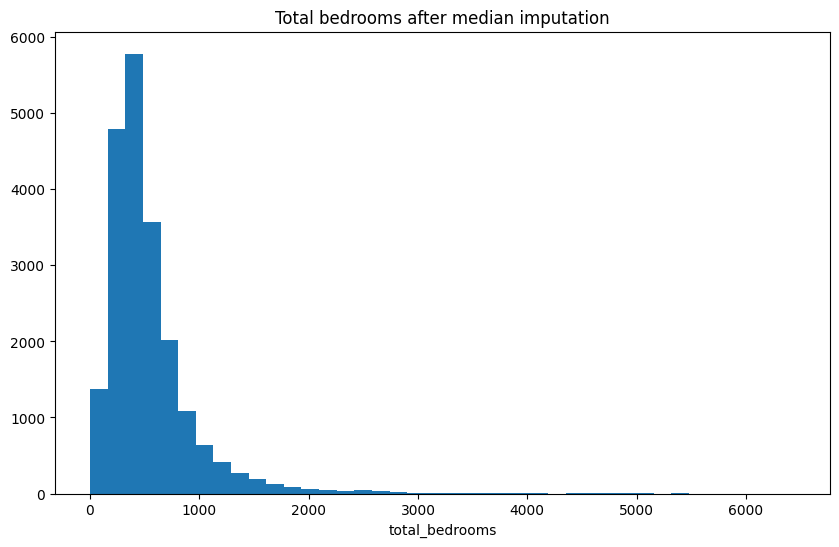

In [18]:
# Show missing before imputation
print('Missing before imputation:', df['total_bedrooms'].isnull().sum())

# For demonstration reload original file and impute median
orig = pd.read_csv(file_path)
print('Original missing:', orig['total_bedrooms'].isnull().sum())

orig['total_bedrooms'].fillna(orig['total_bedrooms'].median(), inplace=True)
print('Missing after median imputation:', orig['total_bedrooms'].isnull().sum())

# Visual compare: before (dropna) vs after
plt.figure()
plt.hist(orig['total_bedrooms'], bins=40)
plt.title('Total bedrooms after median imputation')
plt.xlabel('total_bedrooms')
plt.show()

## 14) Pairwise relationships (scatter matrix)
We'll display a scatter matrix for a subset of meaningful features to inspect pairwise relationships.

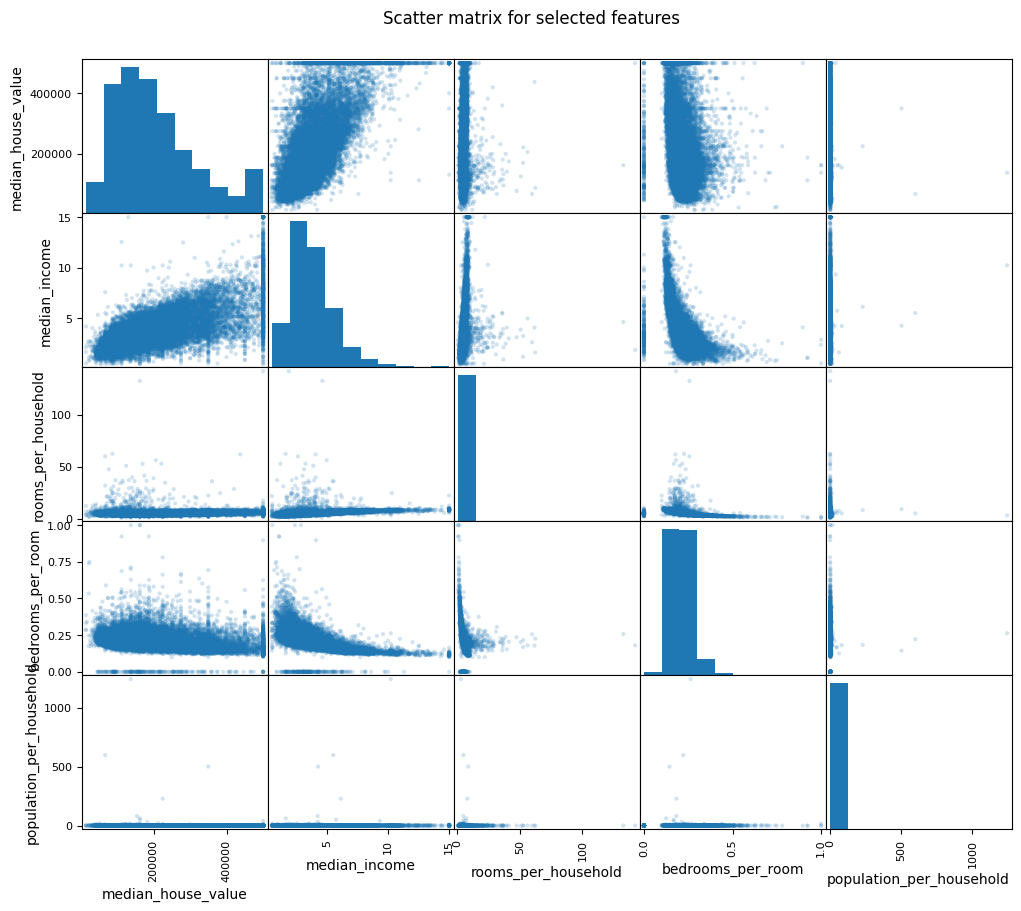

In [19]:
subset = ['median_house_value','median_income','rooms_per_household','bedrooms_per_room','population_per_household']
scatter_matrix(df[subset], figsize=(12, 10), alpha=0.2)
plt.suptitle('Scatter matrix for selected features', y=0.93)
plt.show()

## 15) Key findings & recommendations
Summarize main observations from the EDA and propose next steps for modeling.

In [23]:
# Summarize key numeric findings programmatically
top_corr = df.corr(numeric_only=True)['median_house_value'].abs().sort_values(ascending=False)
top_corr

median_house_value         1.00
median_income              0.69
bedrooms_per_room          0.24
rooms_per_household        0.15
latitude                   0.14
total_rooms                0.13
housing_median_age         0.11
households                 0.07
total_bedrooms             0.05
longitude                  0.05
population                 0.02
population_per_household   0.02
Name: median_house_value, dtype: float64

### Observations (summary)
- `median_income` shows the strongest positive correlation with `median_house_value`.
- Spatial patterns exist: coastal/near-bay areas tend to have higher median values.
- Engineered features like `rooms_per_household` and `population_per_household` also show meaningful correlation.
- `total_bedrooms` had missing values; median imputation is reasonable but consider more advanced imputation if needed.
- Target distribution is right-skewed; consider log-transform for regression models.

### Recommendations (next steps)
1. Use `median_income`, geolocation, and engineered features as key predictors.
2. Apply log-transform to the target for many regression algorithms.
3. Consider more robust outlier handling or model techniques (e.g., Random Forest, Gradient Boosting).
4. If improving performance, try spatial models or include interaction terms.

---

*Notebook generated: professional EDA ready for presentation.*